In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set the palette and style to be more minimal
sns.set(style='ticks', palette='Set2')

fnames = ['totalArea', 'roofedSurface', 'bedrooms', 'bathrooms', 'halfBathrooms',
            'antiquity', 'parkingSlots', 'priceAmount', 'priceCurrencyId']

# Urbania Buy postings


In [3]:
buy_df = pd.read_csv("magdalena_buy.csv")
buy_df = buy_df.filter(items=fnames)
buy_df["pricePerMt2"] = buy_df.apply(lambda x: x['priceAmount']/x['roofedSurface'], axis=1)

y = buy_df['priceAmount']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
buy_df_filtered = buy_df[removed_outliers]

y = buy_df_filtered['roofedSurface']
removed_outliers = y.between(y.quantile(.01), y.quantile(.91))
buy_df_filtered = buy_df_filtered[removed_outliers]

buy_df_filtered = buy_df_filtered[buy_df.priceCurrencyId.eq(6)]
buy_df_filtered = buy_df_filtered[buy_df.bedrooms != 0]
buy_df_filtered = buy_df_filtered[buy_df.bathrooms != 0]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


## Buy examples

In [4]:
print(buy_df_filtered.head())

   totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  antiquity  \
0         40             40         2        1.0            0.0          3   
1         78             78         3        2.0            0.0          5   
2         84             84         3        2.0            NaN          5   
3         63             63         2        2.0            0.0          5   
4        117             71         3        2.0            1.0          1   

   parkingSlots  priceAmount  priceCurrencyId  pricePerMt2  
0           NaN     224400.0              6.0  5610.000000  
1           NaN     315400.0              6.0  4043.589744  
2           1.0     464800.0              6.0  5533.333333  
3           NaN     365200.0              6.0  5796.825397  
4           2.0     528000.0              6.0  7436.619718  


## Buy Description

In [5]:
print(buy_df_filtered.describe())

        totalArea  roofedSurface    bedrooms   bathrooms  halfBathrooms  \
count  184.000000     184.000000  184.000000  183.000000      47.000000   
mean    79.043478      78.934783    2.396739    2.136612       0.297872   
std     20.624095      20.446280    0.768357    0.600296       0.462267   
min     39.000000      40.000000    1.000000    1.000000       0.000000   
25%     63.750000      64.000000    2.000000    2.000000       0.000000   
50%     80.000000      80.000000    3.000000    2.000000       0.000000   
75%     95.000000      94.250000    3.000000    2.000000       1.000000   
max    125.000000     125.000000    4.000000    4.000000       1.000000   

        antiquity  parkingSlots    priceAmount  priceCurrencyId  pricePerMt2  
count  184.000000    120.000000     184.000000            184.0   184.000000  
mean     1.788043      1.033333  522436.043478              6.0  6633.100916  
std      1.442398      0.180258  174170.910203              0.0  1326.867483  
min     

## Buy Correlation

In [6]:
print(buy_df_filtered.corr())

                 totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
totalArea         1.000000       0.959387  0.744439   0.658704       0.269264   
roofedSurface     0.959387       1.000000  0.737325   0.674762       0.210229   
bedrooms          0.744439       0.737325  1.000000   0.562181       0.072224   
bathrooms         0.658704       0.674762  0.562181   1.000000      -0.168237   
halfBathrooms     0.269264       0.210229  0.072224  -0.168237       1.000000   
antiquity         0.039438       0.033622  0.194625  -0.016077      -0.086629   
parkingSlots      0.227960       0.123693  0.204003   0.293348      -0.055493   
priceAmount       0.783636       0.799124  0.416376   0.626507       0.478972   
priceCurrencyId        NaN            NaN       NaN        NaN            NaN   
pricePerMt2      -0.012547      -0.042485 -0.330419   0.152660       0.502549   

                 antiquity  parkingSlots  priceAmount  priceCurrencyId  \
totalArea         0.039438      0.

# Urbania Rent postings

In [7]:
rent_df = pd.read_csv("magdalena_rent.csv")
rent_df = rent_df.filter(items=fnames)
rent_df["pricePerMt2"] = rent_df.apply(lambda x: x['priceAmount']/x['roofedSurface'], axis=1)

y = rent_df['priceAmount']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
rent_df_filtered = rent_df[removed_outliers]

y = rent_df_filtered['roofedSurface']
removed_outliers = y.between(y.quantile(.01), y.quantile(.91))
rent_df_filtered = rent_df_filtered[removed_outliers]

rent_df_filtered = rent_df_filtered[rent_df.priceCurrencyId.eq(6)]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


## Rent examples

In [8]:
print(rent_df_filtered.head())

   totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  antiquity  \
0         87             87         3          2            0.0          2   
2         85             85         3          2            0.0          2   
3         95             95         3          2            0.0          5   
4        112            112         3          2            1.0          5   
6        102            102         3          3            0.0          5   

   parkingSlots  priceAmount  priceCurrencyId  pricePerMt2  
0           NaN         2500                6    28.735632  
2           1.0         2500                6    29.411765  
3           1.0         3100                6    32.631579  
4           2.0         3300                6    29.464286  
6           1.0         2700                6    26.470588  


## Rent description

In [9]:
print(rent_df_filtered.describe())

        totalArea  roofedSurface   bedrooms  bathrooms  halfBathrooms  \
count   39.000000      39.000000  39.000000  39.000000      34.000000   
mean    84.769231      84.769231   2.410256   1.974359       0.117647   
std     18.545054      18.545054   0.751068   0.537400       0.327035   
min     42.000000      42.000000   1.000000   1.000000       0.000000   
25%     75.000000      75.000000   2.000000   2.000000       0.000000   
50%     83.000000      83.000000   3.000000   2.000000       0.000000   
75%    100.000000     100.000000   3.000000   2.000000       0.000000   
max    113.000000     113.000000   4.000000   3.000000       1.000000   

       antiquity  parkingSlots  priceAmount  priceCurrencyId  pricePerMt2  
count  39.000000     24.000000    39.000000             39.0    39.000000  
mean    3.641026      1.083333  2446.615385              6.0    29.414548  
std     1.327585      0.282330   590.976516              0.0     5.720105  
min     1.000000      1.000000  1500.0

## Rent correlation

In [10]:
print(rent_df_filtered.corr())

                 totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
totalArea         1.000000       1.000000  0.622900   0.387548       0.311258   
roofedSurface     1.000000       1.000000  0.622900   0.387548       0.311258   
bedrooms          0.622900       0.622900  1.000000   0.613537       0.346984   
bathrooms         0.387548       0.387548  0.613537   1.000000       0.234202   
halfBathrooms     0.311258       0.311258  0.346984   0.234202       1.000000   
antiquity         0.120536       0.120536 -0.006767   0.392500       0.019973   
parkingSlots      0.043811       0.043811 -0.269680  -0.358671       0.250000   
priceAmount       0.620085       0.620085  0.590577   0.565658       0.274416   
priceCurrencyId        NaN            NaN       NaN        NaN            NaN   
pricePerMt2      -0.453109      -0.453109 -0.115813   0.099158      -0.026142   

                 antiquity  parkingSlots  priceAmount  priceCurrencyId  \
totalArea         0.120536      0.

# Buy price/mt2 = [bedrooms + parking slots] x bathrooms

In [11]:
buy_price_per_bedroom_and_bathroom = pd.pivot_table(buy_df_filtered, values='pricePerMt2', index=['bedrooms'],
               columns=['bathrooms'], aggfunc=np.mean).round(2)
print(buy_price_per_bedroom_and_bathroom)

bathrooms      1.0      2.0      3.0      4.0
bedrooms                                     
1          6484.57  8279.45      NaN      NaN
2          5426.19  6929.57  5912.95      NaN
3              NaN  5848.34  7208.07  6015.08
4              NaN      NaN      NaN  6941.82


# Buy count = [bedrooms + parking slots] x bathrooms


In [12]:
buy_priceAmount_per_bedroom_and_bathroom = pd.pivot_table(buy_df_filtered, values='priceAmount', index=['bedrooms'],
               columns=['bathrooms'], aggfunc=np.mean).round(2)
print(buy_priceAmount_per_bedroom_and_bathroom)

bathrooms        1.0        2.0       3.0        4.0
bedrooms                                            
1          317515.93  532154.19       NaN        NaN
2          281085.00  451745.18  419819.5        NaN
3                NaN  509585.79  752966.7  561737.33
4                NaN        NaN       NaN  763600.00


# Buy roofedSurface = [bedrooms + parking slots] x bathrooms

In [13]:
buy_roofedSurface_bedroom_and_bathroom = pd.pivot_table(buy_df_filtered, values='roofedSurface', index=['bedrooms'],
               columns=['bathrooms'], aggfunc=np.mean).round(2)
print(buy_roofedSurface_bedroom_and_bathroom)

bathrooms    1.0    2.0     3.0    4.0
bedrooms                              
1          49.29  64.19     NaN    NaN
2          52.25  65.61   71.00    NaN
3            NaN  86.20  104.48   94.0
4            NaN    NaN     NaN  110.0


# Rent price/mt2 = [bedrooms + parking slots] x bathrooms

In [14]:
rent_price_per_bedroom_and_bathroom = pd.pivot_table(rent_df_filtered, values='pricePerMt2', index=['bedrooms'], 
                                                     columns=['bathrooms'], aggfunc=np.mean).round(2)
count_rent_price_per_bedroom_and_bathroom = pd.pivot_table(rent_df_filtered, values='pricePerMt2', index=['bedrooms'], 
                                                           columns=['bathrooms'], aggfunc='count').round(2)
print(rent_price_per_bedroom_and_bathroom)
print(count_rent_price_per_bedroom_and_bathroom)

bathrooms      1      2      3
bedrooms                      
1          38.59  33.50    NaN
2          16.00  28.52    NaN
3            NaN  30.45  28.53
4            NaN    NaN  31.82
bathrooms    1     2    3
bedrooms                 
1          3.0   2.0  NaN
2          3.0  11.0  NaN
3          NaN  15.0  4.0
4          NaN   NaN  1.0


## Andres Real State index

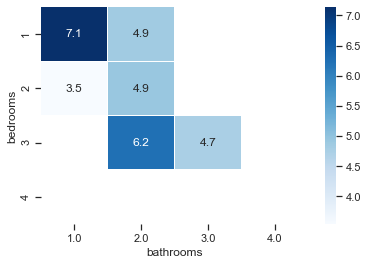

In [15]:
andres_index = (rent_price_per_bedroom_and_bathroom * 12) / buy_price_per_bedroom_and_bathroom * 100
sns.heatmap(andres_index, annot=True, linewidths=.100, cmap='Blues')

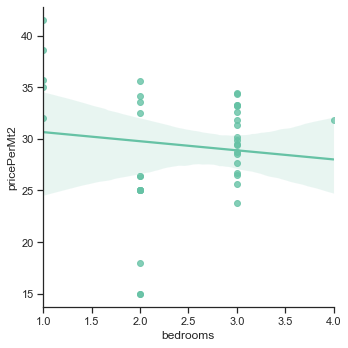

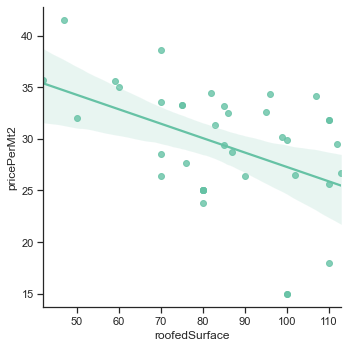

In [16]:
# Create the scatter plot
sns.lmplot(x="bedrooms", y="pricePerMt2", data=rent_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

sns.lmplot(x="roofedSurface", y="pricePerMt2", data=rent_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

# plt.show()

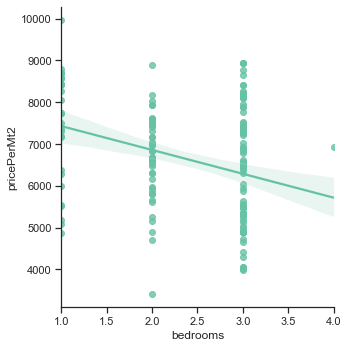

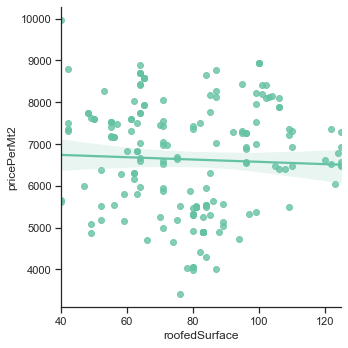

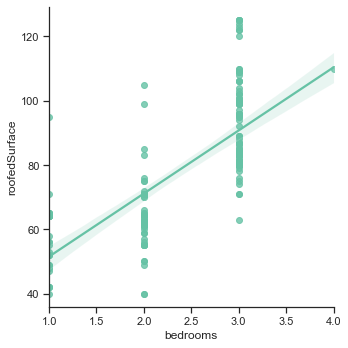

In [17]:
sns.lmplot(x="bedrooms", y="pricePerMt2", data=buy_df_filtered)
sns.despine()

sns.lmplot(x="roofedSurface", y="pricePerMt2", data=buy_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

sns.lmplot(x="bedrooms", y="roofedSurface", data=buy_df_filtered)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

In [18]:
buy_1x1_df_filtered = buy_df_filtered[buy_df_filtered.bedrooms == 1]
buy_1x1_df_filtered = buy_1x1_df_filtered[buy_1x1_df_filtered.bathrooms == 1]
print(buy_1x1_df_filtered.describe())

       totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
count   14.00000      14.000000      14.0       14.0        4.00000   
mean    48.50000      49.285714       1.0        1.0        0.50000   
std      5.90632       4.998901       0.0        0.0        0.57735   
min     39.00000      42.000000       1.0        1.0        0.00000   
25%     43.25000      47.250000       1.0        1.0        0.00000   
50%     48.50000      49.000000       1.0        1.0        0.50000   
75%     52.00000      52.000000       1.0        1.0        1.00000   
max     60.00000      58.000000       1.0        1.0        1.00000   

       antiquity  parkingSlots    priceAmount  priceCurrencyId  pricePerMt2  
count  14.000000           7.0      14.000000             14.0    14.000000  
mean    1.500000           1.0  317515.928571              6.0  6484.569140  
std     1.160239           0.0   54197.389997              0.0  1147.804409  
min     1.000000           1.0  239040.000000   

In [19]:
buy_2x2_df_filtered = buy_df_filtered[buy_df_filtered.bedrooms == 2]
buy_2x2_df_filtered = buy_2x2_df_filtered[buy_2x2_df_filtered.bathrooms == 2]
print(buy_2x2_df_filtered.describe())

       totalArea  roofedSurface  bedrooms  bathrooms  halfBathrooms  \
count  44.000000      44.000000      44.0       44.0      10.000000   
mean   64.863636      65.613636       2.0        2.0       0.100000   
std     9.872656      11.363376       0.0        0.0       0.316228   
min    49.000000      49.000000       2.0        2.0       0.000000   
25%    59.750000      59.750000       2.0        2.0       0.000000   
50%    63.500000      63.500000       2.0        2.0       0.000000   
75%    71.000000      71.000000       2.0        2.0       0.000000   
max    99.000000     105.000000       2.0        2.0       1.000000   

       antiquity  parkingSlots    priceAmount  priceCurrencyId  pricePerMt2  
count  44.000000          29.0      44.000000             44.0    44.000000  
mean    1.477273           1.0  451745.181818              6.0  6929.569803  
std     1.171138           0.0   89807.821857              0.0   974.786302  
min     1.000000           1.0  260000.000000   

bathrooms        1.0        2.0       3.0        4.0
bedrooms                                            
1          317515.93  532154.19       NaN        NaN
2          281085.00  451745.18  419819.5        NaN
3                NaN  509585.79  752966.7  561737.33
4                NaN        NaN       NaN  763600.00
bathrooms          1.0          2.0          3.0          4.0
bedrooms                                                     
1          2645.966083  4434.618250          NaN          NaN
2          2342.375000  3764.543167  3498.495833          NaN
3                  NaN  4246.548250  6274.722500  4681.144417
4                  NaN          NaN          NaN  6363.333333
bathrooms       1        2       3
bedrooms                          
1          2050.0  1850.00     NaN
2          1660.0  2284.64     NaN
3             NaN  2663.13  3002.5
4             NaN      NaN  3500.0


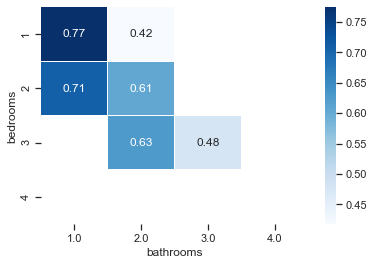

In [21]:
buy_priceAmount_per_bedroom_and_bathroom = pd.pivot_table(buy_df_filtered, values='priceAmount', index=['bedrooms'],
               columns=['bathrooms'], aggfunc=np.mean).round(2)
print(buy_priceAmount_per_bedroom_and_bathroom)

five_percent_rule = buy_priceAmount_per_bedroom_and_bathroom * 0.1 / 12
print(five_percent_rule)

rent_price_per_bedroom_and_bathroom = pd.pivot_table(rent_df_filtered, values='priceAmount', index=['bedrooms'], 
                                                     columns=['bathrooms'], aggfunc=np.mean).round(2)
print(rent_price_per_bedroom_and_bathroom)

five_percent = rent_price_per_bedroom_and_bathroom / five_percent_rule

sns.heatmap(five_percent, annot=True, linewidths=.100, cmap='Blues')